# Proyecto: Clasificación de muertes de civiles por policías en EUA (2015 - 2020)

## 1) Presentación de la empresa, organización o problema específico

Debido a la creciente problemática mundial de muertes civiles en ocasión de encuentros con fuerzas policiales, hemos decidido analizar los datos relacionados a todos los civiles muertos por parte de la policía en Estados Unidos, para los años 2015 a 2020 ambos inclusive, con el relevamiento de distintas condiciones o variables relacionadas al evento (raza del civil, edad, género, si se encontraba armado, tipificación del encuentro con la policia, si el policia fue enjuiciado o no, ect.) y a la ciudad o estado donde ocurrió el hecho, para tratar de relacionar la incidencia de ciertas variables socioeconómicas de los estados. 

Específicamente, y a los efectos de resaltar una situación poco considerada relacionada a esta problemática social, los análisis se centrarán en la condición de si la victima poseía una enfermedad mental al momento del encuentro con la policía, a los efectos de que la información y conclusiones obtenidas sean de utilidad para entes gubernamentales o asociaciones sin fines de lucro, con el objetivo de desarrollar herramientas de contención para evitar que personas con problemas mentales terminen abatidas por la policia en encuentros evitables. 

## 2) Preguntas y objetivos de la investigación
Entre otras, se intentará analizar:
- Estimar si una víctima civil tiene signos de una enfermedad mental al momento del incidente con la policía
- ¿Cuál es la distribución por raza de las víctimas?
- ¿Cuál es la incidencia de los factores socioeconómicos y políticos de los estados en la cantidad de víctimas por millon de habitantes?
- ¿Cuáles son los estados con mayor cantidad de muertes por millón de habitantes?
- ¿Cuáles son las circunstancias más comúnes del encuentro entre el civil y la policía?, ¿los civiles generalmente están armados?

## 3) Conformación del equipo de trabajo
- Magdalena Gambuli
- Jese David Salazar Garcia
- Gonzalo Beloqui

Tutora: Corina Garrido

## 4) Indicación de la fuente del dataset y los criterios de selección (Data Acquisition)

Fuentes de dataset:
1. Datos de hechos y civiles: https://github.com/washingtonpost/data-police-shootings
2. Datos socioeconómicos de los estados: https://data.ers.usda.gov/
3. Datos de partido político y gobernador por Estado.
Fuente: https://www.openicpsr.org/openicpsr/project/102000/version/V3/view

# Criterios de Selección:
Trascendencia de la problemática
Oportunidad y completitud de los datos


## 5) Generación del primer Data Wrangling y EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.

## Data Wrangling

In [ ]:
# importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import scipy
import numpy as np
from matplotlib import cm
from matplotlib import colors
from openpyxl.workbook import Workbook
import io

# fuente de los gráficos
font1 = {'family':'sans-serif','size':18}
font2 = {'family':'sans-serif','size':15}

In [ ]:
# importación Dataset_CIVILIANS
url_file = "https://raw.githubusercontent.com/gonezebel/DataScienceCoderhouse/main/01_DatasetCivilians.csv"
df_civilians = pd.read_csv(url_file, parse_dates=["Death_Date"], dayfirst=True, index_col="Victim_ID", encoding='utf-8')
df_civilians.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5793 entries, 2 to 5792
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Civil_Name               5793 non-null   object        
 1   Death_Date               5793 non-null   datetime64[ns]
 2   Manner_of_death          5793 non-null   object        
 3   Armed                    5793 non-null   object        
 4   Age                      5793 non-null   int64         
 5   Gender                   5793 non-null   object        
 6   Race                     5793 non-null   object        
 7   City                     5793 non-null   object        
 8   State_ID                 5793 non-null   int64         
 9   Signs_of_mental_illness  5793 non-null   bool          
 10  Flee                     5793 non-null   object        
 11  body_camera              5793 non-null   bool          
 12  longitude                5519 non-

In [ ]:
# importación Dataset_States
url_file = "https://raw.githubusercontent.com/gonezebel/DataScienceCoderhouse/main/Dataset_states_unique.csv"
df_states = pd.read_csv(url_file, dayfirst=True, encoding='utf-8',sep=';')
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      299 non-null    int64  
 1   GDP_Millions              299 non-null    int64  
 2   GDP_PerCapita             299 non-null    int64  
 3   Unemployment_Rate         299 non-null    float64
 4   Poverty_Percent           299 non-null    float64
 5   Median_household_ Income  299 non-null    int64  
 6   Governor_Name             299 non-null    object 
 7   Party                     299 non-null    object 
 8   State_Name                299 non-null    object 
 9   state_initial             299 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 23.5+ KB


In [ ]:
#Merge dataframes a través de campos "year" y "state_initial"
df = pd.merge(df_civilians,df_states, on =['state_initial','Year'],how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5793 entries, 0 to 5792
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Civil_Name                5793 non-null   object        
 1   Death_Date                5793 non-null   datetime64[ns]
 2   Manner_of_death           5793 non-null   object        
 3   Armed                     5793 non-null   object        
 4   Age                       5793 non-null   int64         
 5   Gender                    5793 non-null   object        
 6   Race                      5793 non-null   object        
 7   City                      5793 non-null   object        
 8   State_ID                  5793 non-null   int64         
 9   Signs_of_mental_illness   5793 non-null   bool          
 10  Flee                      5793 non-null   object        
 11  body_camera               5793 non-null   bool          
 12  longitude           

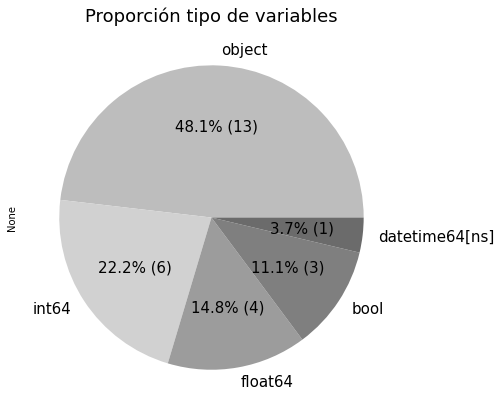

In [ ]:

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}% ({next(gen)})"

counts = df.dtypes.value_counts()

counts.plot(kind='pie',
            fontsize=15,
            figsize=(7, 7),
            autopct=autopct_fun(counts),
            legend = False,
            colors=['#BDBDBD','#D1D1D1','#9C9C9C','#7F7F7F','#6B6B6B']
            )
plt.title('Proporción tipo de variables',fontdict=font1)
plt.show()

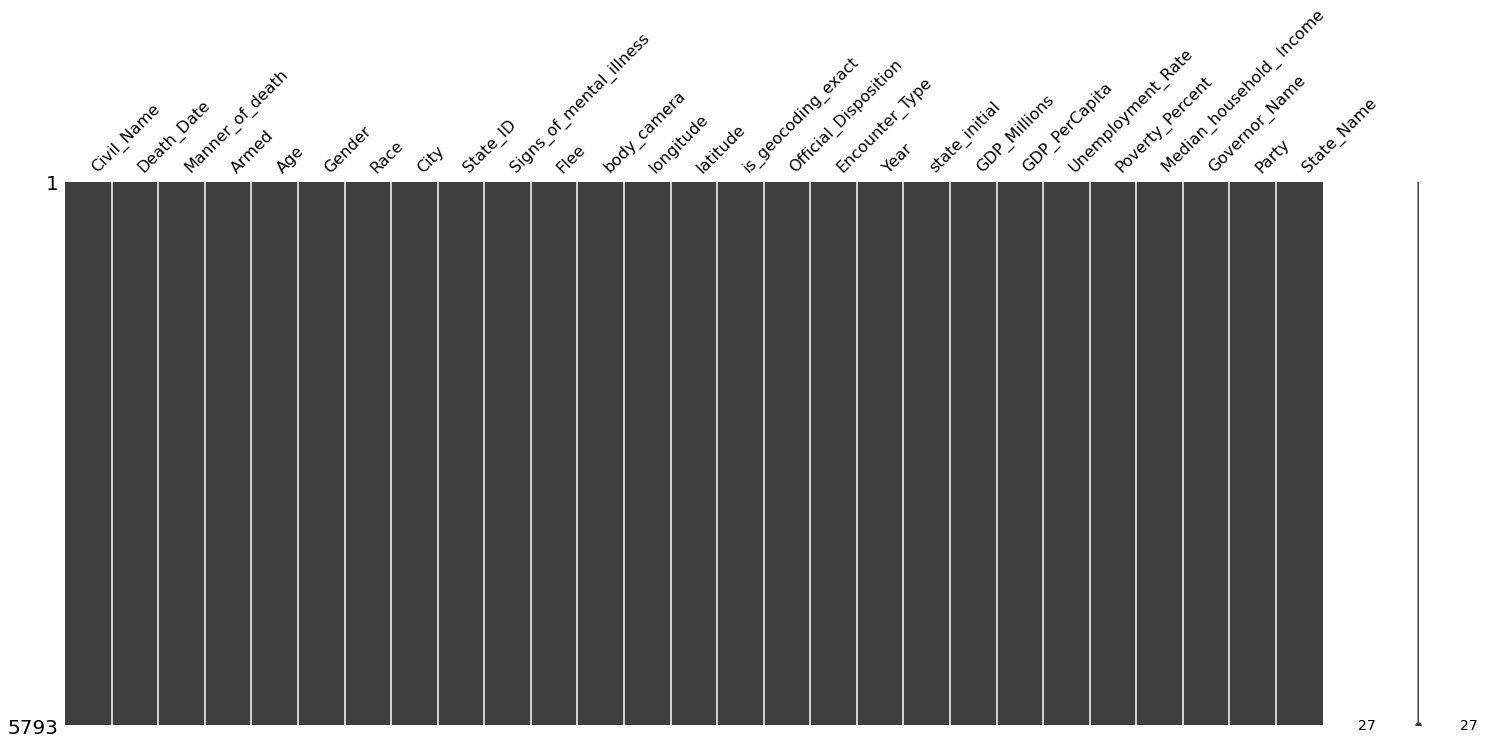

In [ ]:
# visualización de null
%matplotlib inline
msno.matrix(df)

En cuanto a los datos null es un dataset con poca información faltante como puede observarse en el gráfico superior. Tan sólo 2 columnas presentan datos faltantes.

In [ ]:
## verificación de campos y cantidad de nulls
df.isnull().sum()

Civil_Name                    0
Death_Date                    0
Manner_of_death               0
Armed                         0
Age                           0
Gender                        0
Race                          0
City                          0
State_ID                      0
Signs_of_mental_illness       0
Flee                          0
body_camera                   0
longitude                   274
latitude                    274
is_geocoding_exact            0
Official_Disposition          0
Encounter_Type                0
Year                          0
state_initial                 0
GDP_Millions                  0
GDP_PerCapita                 0
Unemployment_Rate             0
Poverty_Percent               0
Median_household_ Income      0
Governor_Name                 0
Party                         0
State_Name                    0
dtype: int64

El 4.7% de las filas del dataset presentan valores faltantes. Emplearemos el método de imputación tomando la mediana de cada estado, esto con el fin de no distorsionar los datos.

In [ ]:
# corrección de nulls en columnas de longitud y latitud, considerando el promedio de cada campo para el resto entradas de dato agrupadas por estado.
df['longitude']=df.groupby('state_initial')['longitude'].apply(lambda x:x.fillna(x.mean()))
df['latitude']=df.groupby('state_initial')['latitude'].apply(lambda x:x.fillna(x.mean()))
df.isnull().sum()

Civil_Name                  0
Death_Date                  0
Manner_of_death             0
Armed                       0
Age                         0
Gender                      0
Race                        0
City                        0
State_ID                    0
Signs_of_mental_illness     0
Flee                        0
body_camera                 0
longitude                   0
latitude                    0
is_geocoding_exact          0
Official_Disposition        0
Encounter_Type              0
Year                        0
state_initial               0
GDP_Millions                0
GDP_PerCapita               0
Unemployment_Rate           0
Poverty_Percent             0
Median_household_ Income    0
Governor_Name               0
Party                       0
State_Name                  0
dtype: int64

In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5793 entries, 0 to 5792
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Civil_Name                5793 non-null   object        
 1   Death_Date                5793 non-null   datetime64[ns]
 2   Manner_of_death           5793 non-null   object        
 3   Armed                     5793 non-null   object        
 4   Age                       5793 non-null   int64         
 5   Gender                    5793 non-null   object        
 6   Race                      5793 non-null   object        
 7   City                      5793 non-null   object        
 8   State_ID                  5793 non-null   int64         
 9   Signs_of_mental_illness   5793 non-null   bool          
 10  Flee                      5793 non-null   object        
 11  body_camera               5793 non-null   bool          
 12  longitude           

In [ ]:
df.sort_values(['Death_Date']).tail()

,Civil_Name,Death_Date,Manner_of_death,Armed,Age,Gender,Race,City,State_ID,Signs_of_mental_illness,...,Year,state_initial,GDP_Millions,GDP_PerCapita,Unemployment_Rate,Poverty_Percent,Median_household_ Income,Governor_Name,Party,State_Name
5786,Dolal Idd,2020-12-30,shot,Gun,23,M,B,Minneapolis,24,False,...,2020,MN,373739,68185,0.062,0.084,78461,Tim Walz,Democrat,Minnesota
5787,David Jacob Rigsby,2020-12-30,shot,Gun,39,M,W,Waverly,43,False,...,2020,TN,369574,55532,0.075,0.132,54665,Bill Lee,Republican,Tennessee
5790,Peter K. England,2020-12-30,shot,Gun,21,M,A,Ammon,13,False,...,2020,ID,83822,48033,0.054,0.092,66499,Brad Little,Republican,Idaho
5791,Jeffrey Marvin,2020-12-31,shot,Vehicle,63,M,B,Starke County,15,False,...,2020,IN,375337,56729,0.071,0.120,66360,Eric Holocomb,Republican,Indiana
5792,David Randall Shepherd,2020-12-31,shot,Gun,39,M,W,Beaumont,44,True,...,2020,TX,1775588,62712,0.076,0.140,68093,Greg Abbot,Republican,Texas


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5793.0,37.151735,13.027632,6.000,27.000,35.000,46.000,91.000
State_ID,5793.0,23.220956,16.016562,1.000,6.000,21.000,38.000,51.000
longitude,5793.0,-97092.499267,16698.689607,-158137.000,-112043.000,-93821.000,-83031.000,-68014.000
latitude,5793.0,36745.258372,5429.512188,19498.000,33487.000,36122.000,40031.000,71301.000
Year,5793.0,2017.501813,1.721865,2015.000,2016.000,2017.000,2019.000,2020.000
GDP_Millions,5793.0,888231.360780,901917.626641,30988.000,241704.000,508241.000,1116435.000,3052645.000
GDP_PerCapita,5793.0,53233.106163,12926.038825,31522.000,43866.000,52217.000,58452.000,202455.000
Unemployment_Rate,5793.0,0.050648,0.017067,0.022,0.039,0.048,0.059,0.128
Poverty_Percent,5793.0,0.128232,0.028668,0.037,0.108,0.130,0.148,0.220
Median_household_ Income,5793.0,61999.227861,10206.590186,41754.000,54181.000,60097.000,69600.000,94384.000


## Análisis Univariado

### 1. Análisis de muertes mensuales

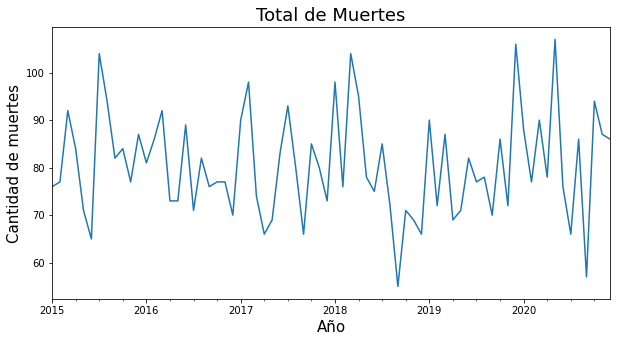

In [ ]:
muertes_mensuales = df.groupby(df['Death_Date'].dt.to_period('M')).size()
muertes_mensuales.plot(figsize=(10, 5))
plt.title('Total de Muertes', fontdict=font1)
plt.xlabel('Año', fontdict=font2)
plt.ylabel('Cantidad de muertes', fontdict=font2)
plt.show()

In [ ]:
import plotly.express as px
fig = px.box(y=muertes_mensuales.values, points="all",
             title='Distribución del total de victimas por mes del 2015 al 2020')
fig.show()

Al observar estos gráficos, nos llama la atención que la tendencia es muy irregular, sin embargo al visualizar las medidas de tendencia central, es de consideración que el total de civiles muertos mensualmente estén entre los 72 y 87.

### 2. Análisis de muertes por edad

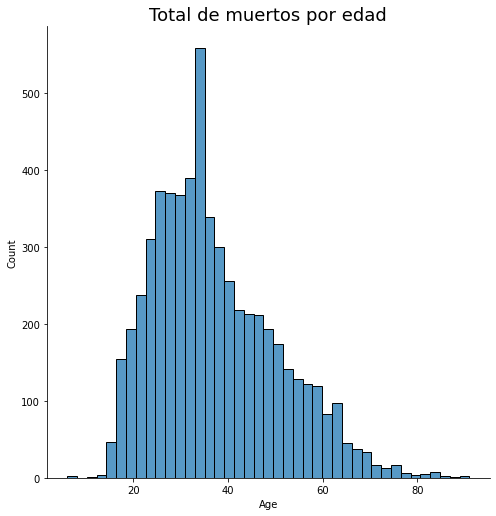

In [ ]:
sns.displot(df.Age, kde=False, height=7)
plt.title('Total de muertos por edad', fontdict=font1)
plt.show()

In [ ]:
scipy.stats.describe(df['Age'])

DescribeResult(nobs=5793, minmax=(6, 91), mean=37.151734852408076, variance=169.7192032225023, skewness=0.7075762930120995, kurtosis=0.12384936035072824)

In [ ]:
scipy.stats.mode(df['Age'])

ModeResult(mode=array([31]), count=array([204]))

La distribución por edad está muy marcado en el rango de edad entre los 20 y 40 años. En base al índice de curtosis y asimetría de la variable Age, podemos determinar que la distribución es asimétrica a la derecha, lo que significa que después de los 50 años baja la propensión a que la policía utilice la fuerza letal como respuesta. Esto se puede deber a múltiples motivos, por ejemplo que a partir de esa edad baje la tendencia a cometer crímenes más "violentos" que generen una respuesta de igual grado por parte de la policía, o que la misma policía de forma consciente/inconsciente no responde igual frente a la percibida amenaza de una persona de 20 años que una de +50 años.

### 3. Análisis de muertes por estado

In [ ]:
df['Month'] = df['Death_Date'].dt.month
df_1 = pd.DataFrame({'count': df.groupby(['State_Name', 'Month']).size()})
df_1 = df_1.reset_index()
df_1.head()

,State_Name,Month,count
0,Alabama,1,11
1,Alabama,2,12
2,Alabama,3,9
3,Alabama,4,5
4,Alabama,5,8


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



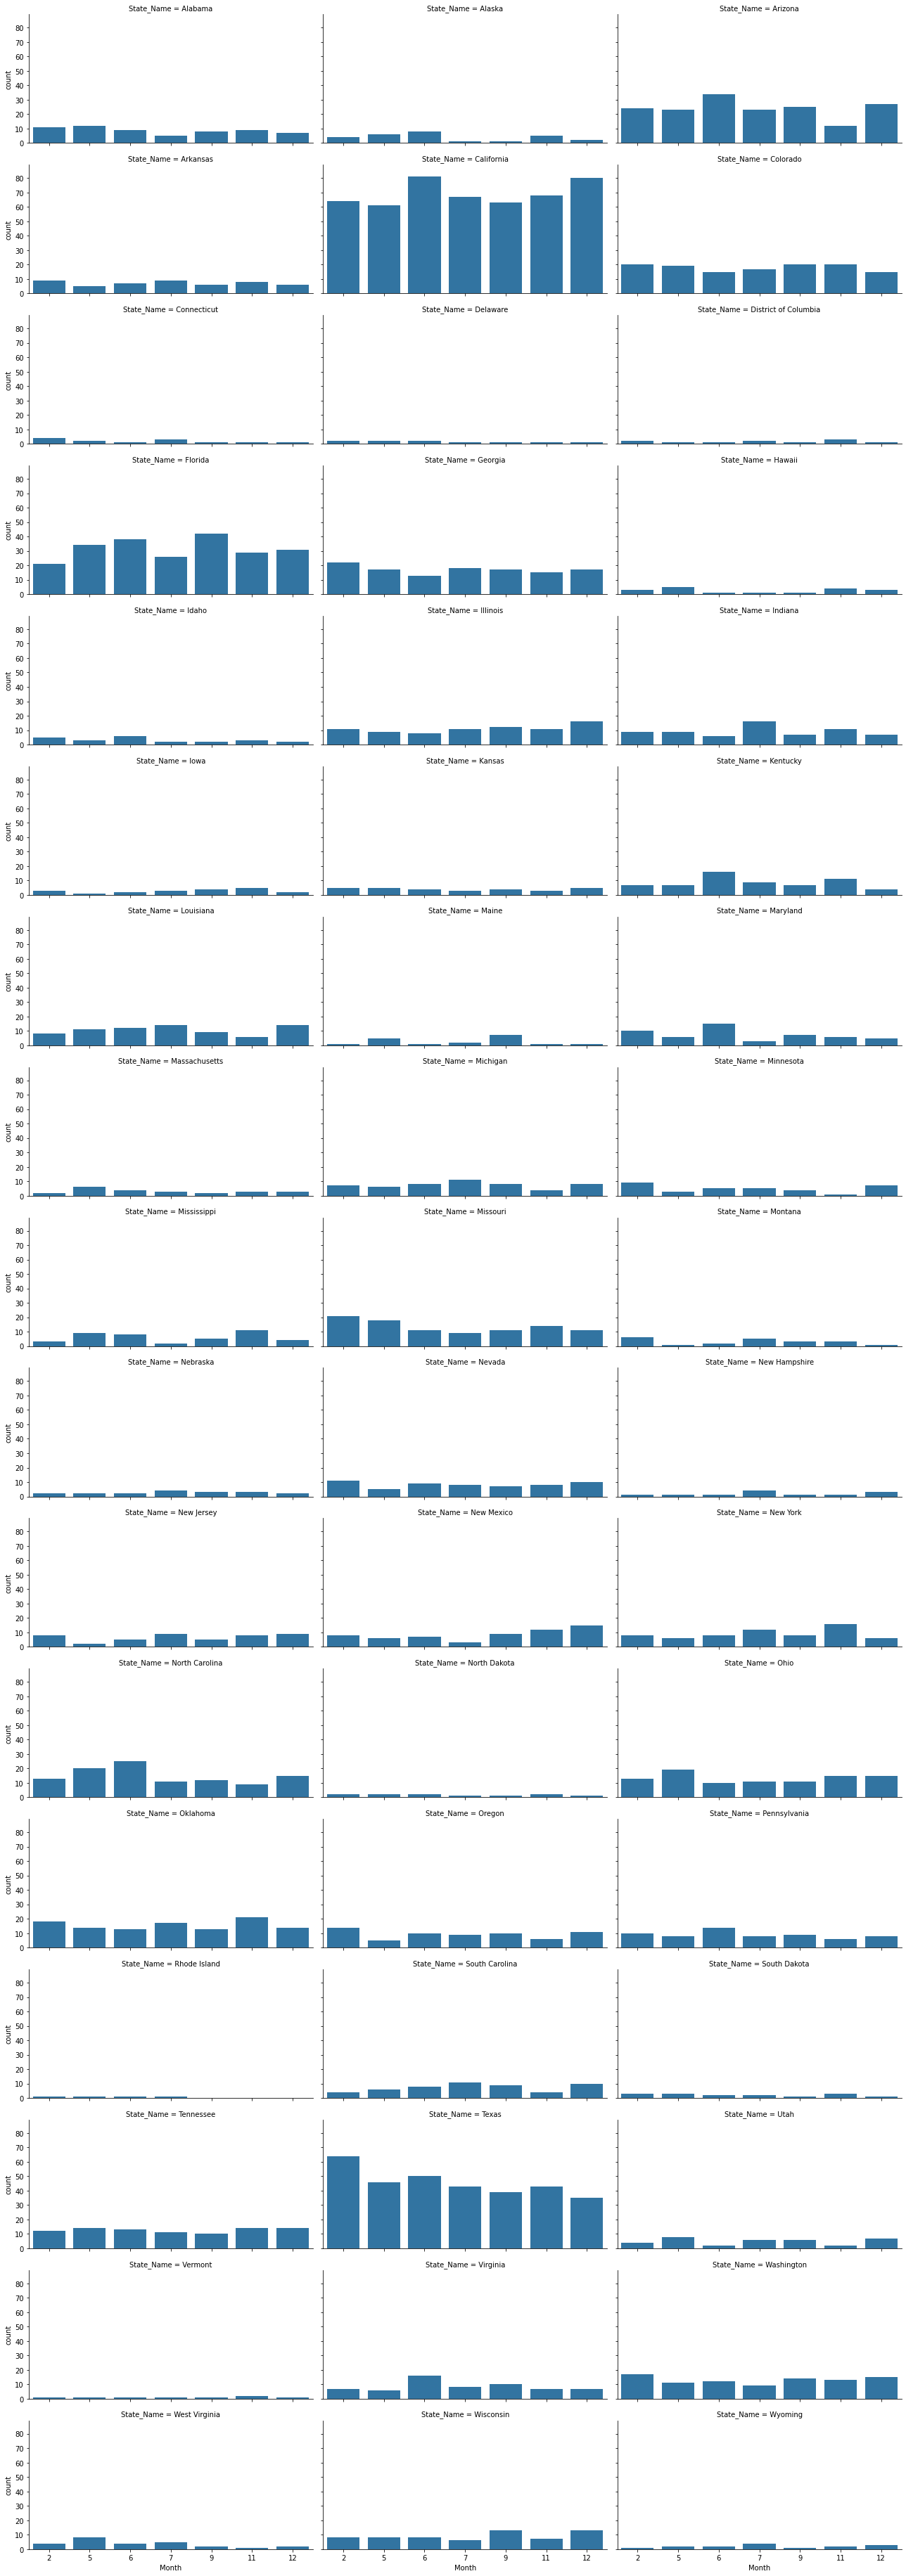

In [ ]:
chart = sns.FacetGrid(df_1, col='State_Name', margin_titles=True, col_wrap=3, aspect=2, row_order=df['State_Name'].unique)
chart.map(sns.barplot, 'Month', 'count',)
plt.show()

Obteniendo una estadística de los eventos ocurridos en cada mes, descubrimos que hay meses en los que no ha ocurrido alguna muerte (Enero, Marzo, Abril, Agosto y Octubre). El top 3 de los estados donde se han presentado más muertes son: California, Florida y Texas.

### 4. Análisis de muertes por Raza

In [ ]:
df_pie = df[['Race','State_ID']]
pie_race = df_pie.groupby('Race').agg('count')
pie_race=pie_race.rename(columns={'State_ID': 'Frecuencia'})
pie_race

,Frecuencia
Race,
A,106
B,1548
H,1087
N,85
O,48
W,2919


In [ ]:
import plotly.express as px
fig = px.pie(pie_race, values='Frecuencia', \
             names=pie_race.index, title='Muertes por Raza')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

El 50,4% de los fallecidos civiles por la policía en EEUU son de raza blanca, seguido por un 26,7% de raza afroamericana y el 18.8% de hispanos.

### 5. Análisis de llamadas al 911

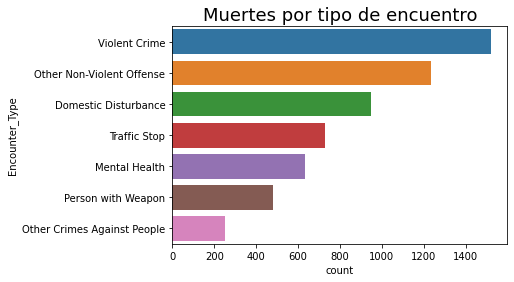

In [ ]:
sns.countplot(y='Encounter_Type', data=df, order=df['Encounter_Type'].value_counts().index)
plt.title('Muertes por tipo de encuentro', fontdict=font1)
plt.show()

Si bien la mayor cantidad de muertes civiles se producen en ocasión de crimen violento perpertrado por el civil abatido, la mayoría de los casos representan hechos o delitos no violentos, como "other non-violent offence", "domestic disturbance", o directamente "Mental Health". Este ultimo caso, que llega a pasar las 600 víctimas en el período 2015-2020, debiera ser de principal consideración dado que se trata de personas enfermas que son abatidas como si representaran amenaza de vida para otros.

La policía no esta preparada ni entrenada para poder asistir a personas con enfermedades mentales/transtornos que causen un comportamiento errático, y muchas veces eso conlleva a que se los vea como peligrosos.

### 6. Análisis de muertes por tipo de arma

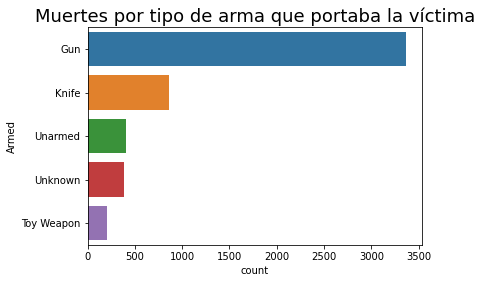

In [ ]:
sns.countplot(y='Armed', data=df, order=pd.value_counts(df['Armed']).iloc[:5].index)
plt.title('Muertes por tipo de arma que portaba la víctima', fontdict=font1)
plt.show()

En cuanto al análisis del tipo de arma poseida por los civiles abatidos, si bien predominan armas de fuego, hay más de 500 casos entre civiles desarmados y con armas de juguete, lo que configuraría un claro exceso policíaco.

### 7. Análisis de porcentaje de víctimas civiles con alguna enfermedad mental

In [ ]:
pie_mental = df.groupby('Signs_of_mental_illness')[['Age']].agg('count')
pie_mental = pie_mental.rename({'Age': 'Frecuencia'}, axis=1)

fig = px.pie(pie_mental, values='Frecuencia', names=pie_mental.index, title='Porcentaje de civiles con enfermedad mental muertos por policías en USA, 2015-2020')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Este gráfico nos muestra como el 23.8% de los civiles muertos tenían algún problema mental.

Según estudios de la NAMI (National Alliance on Mental Illness) en EE.UU. 1 de cada 5 adultos sufre de una enfermedad mental, y 1 de cada 20 sufre una enfermedad mental grave. Hay un claro exceso de brutalidad policial en este caso comparando los números, ya que los casos más graves de enfermedad son un 5,6% de la población, comparado al 23.8% que se observa que murió a manos de la policía.

## Analisis Bivariado

### 1) Histograma de muertes por edad y género

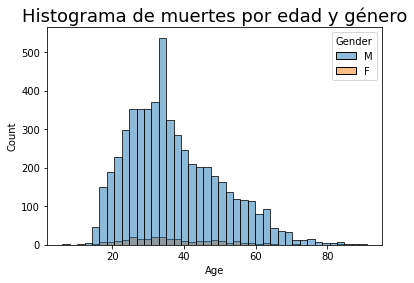

In [ ]:
sns.histplot(data=df, x="Age", hue="Gender")
plt.title("Histograma de muertes por edad y género", fontdict=font1)
plt.show()

Además de la distribución de edad observada anteriormente (marcada entre 20 y 40 años), se puede ver la diferencia en muertes entre hombres y mujeres. Probablemente se debe a que los números de mujeres que comiten un crimen es mucho más bajo comparado a los hombres.

### 2) Catplot de causa de intervención policíaca por año

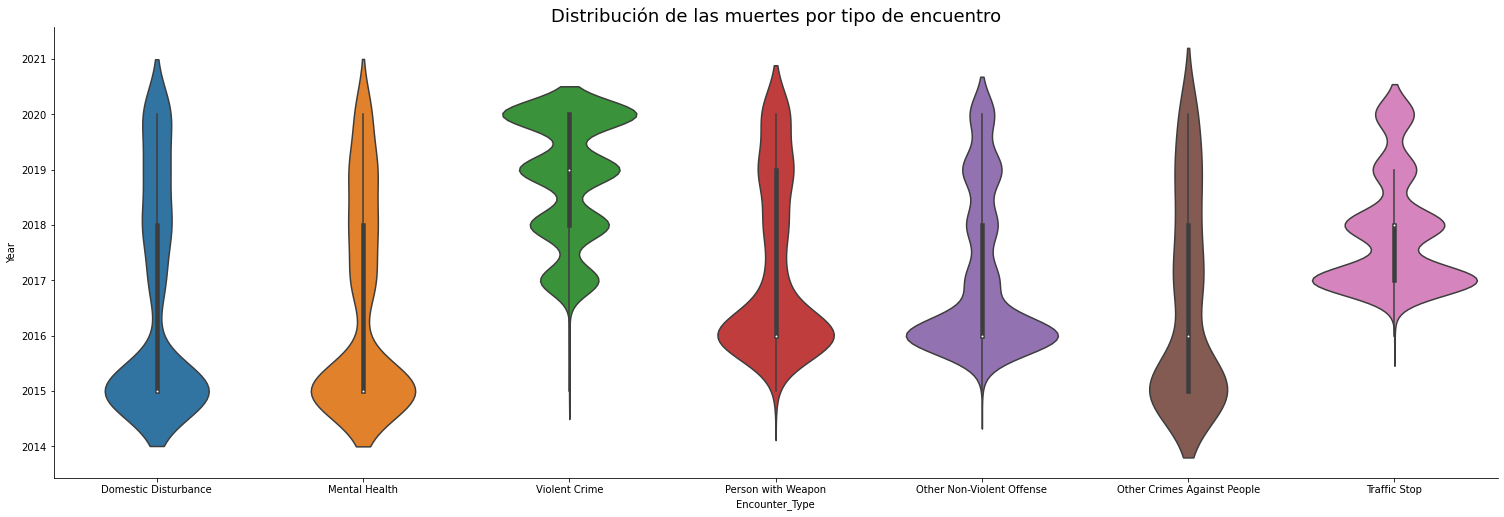

In [ ]:
sns.catplot(data=df, x="Encounter_Type", y="Year", kind="violin", height=7, aspect=15/5)
plt.title('Distribución de las muertes por tipo de encuentro', fontdict=font1)
plt.show()

Podemos observar la variación de los reportes en las llamadas al 911, con aumentos marcados en los crímenes violentos con cada año.

### 3) Histograma de causa de intervención policíaca posteriores a 2018


In [ ]:
df_covid = df[df['Year'] > 2018] 
plt.figure(figsize=(20,6))
sns.histplot(data=df_covid, x="Encounter_Type", hue='Year')

Parece haber un incremento marcado en los crímenes violentos entre 2019 y 2020, puede deberse a la situación política y sanitaria del país durante este año.

### 4) Catplot de tipo de arma utilizada por el civil por año

In [ ]:
df_armed = df.loc[df['Armed'].isin(['Gun','Knife','Unarmed','Unknown','Toy Weapon'])]
plt.figure(figsize=(20,6))
sns.catplot(data=df_armed, x="Armed", y="Year", kind="violin", height=5, aspect=15/5)

Las personas que portan arma de fuego han incrementando con el paso del tiempo, siendo más del triple que la segunda categoría, esto se alinea con el aumento de crímenes violentos y la facilidad para acceder a armas en EE.UU.

### 5) Distribución de estados por conteo de víctimas e ingreso medio por hogar

In [ ]:
#Dataset x estado
df_by_state = df[['Civil_Name','state_initial','Year','Median_household_ Income','Party']]
df_by_state_2020 = df_by_state[df_by_state.Year.isin([2020])]
df_by_state_2020 = df_by_state_2020.groupby(['Year','Party','state_initial','Median_household_ Income']).agg({'Civil_Name':'count'}).reset_index()
df_by_state_2020 = df_by_state_2020.rename(columns={'Civil_Name':'Victims_Count'},inplace=False)
df_by_state_2020.head()

In [ ]:
df_by_state_2020.plot.scatter(x='Median_household_ Income', y='Victims_Count')
plt.title("Distribución de estados por conteo de víctimas e ingreso medio por hogar" , size = 18 )

Al contraro de lo que pudiera suponerse, al menos en 2020, los estados con menor ingreso medio por hogar no fueron, generalmente los que mas muertes de civiles por parte de la policía tuvieron. Solo hay un caso a analizar, que está entre USD 50K y USd 60K anuales y tiene más de 80 muertes en el año, además del caso que tiene 140 (CA), aunque está de la media hacia arriba en cuanto a ingreso medio.

### 6) Bar Catplot de frecuencia de victimas con signos de enfermedad mental por género

In [ ]:
#Comparación Razas vs Mental Illenes
df_race_mental = df[['Race','Signs_of_mental_illness','Civil_Name']]
plot_race_mental = df_race_mental.groupby(['Race','Signs_of_mental_illness'], as_index=False)['Civil_Name'].count()
plot_race_mental = plot_race_mental.rename(columns={'Civil_Name': 'Frequency'})
plot_race_mental.set_index('Race')
plot_race_mental

In [ ]:
sns.catplot(x="Race", y="Frequency", kind="bar", hue="Signs_of_mental_illness", data=plot_race_mental)
plt.title("Presencia de enfermedad mental en civiles abatidos por la policía en USA, por raza, 2015-2020" , size = 14 )

Comparando la cantidad de civiles muertos por raza y signo de enfermedad mental, podemos observar que la proporción de civiles con signos de enfermedad mental al momento de ser abatidos por la policía es mucho mas significativa para la raza blanca y asiática, con casi la mitad de civiles con dichas características.

# Análisis Multivariado

In [ ]:
df_biv = df.copy()
columns_drop = ['Manner_of_death', 'Civil_Name', 'Death_Date', 'City', 'longitude', 'latitude', 'is_geocoding_exact', 'Governor_Name', 'State_Name', 'state_initial']
df_biv.drop(columns=columns_drop, axis=1, inplace=True)

for col in ['Armed', 'Gender', 'Race', 'Signs_of_mental_illness', 'Flee', 'body_camera', 'Official_Disposition', 'Encounter_Type', 'Party']:
    df[col] = df[col].astype('category')

df_biv.info()

In [ ]:
for col in ['Armed', 'Gender', 'Race', 'Signs_of_mental_illness', 'Flee', 'body_camera', 'Official_Disposition', 'Encounter_Type', 'Party']:
    df_biv[col] = df[col].cat.codes

df_biv.head()

In [ ]:
plt.figure(figsize=(18, 7))
sns.heatmap(df_biv.corr(), annot=True)
plt.title( "Mapa de correlación de variables" , size = 18 ) 

Analizando el heatmap de los datos, son de interés algunas correlaciones fuertes que son generadas por las situaciones económicas del estado. Entre los features de interés como la edad, raza, signos de problemas mentales, si estaba armado o el año en que murió, no visualizamos una relación fuerte entre las demás variables.

In [ ]:
#Análisis de Cantidad de muertes por millón por estado en relación con Nivel de pobreza  y educación por estado y partido político en 2020
df_by_state = df[['Civil_Name','state_initial','Year','Median_household_ Income','Party','Poverty_Percent','Unemployment_Rate','GDP_Millions','GDP_PerCapita']]
df_by_state_2020 = df_by_state[df_by_state.Year.isin([2020])]
df_by_state_2020 = df_by_state_2020.groupby(['Year','Party','state_initial','Poverty_Percent','Unemployment_Rate','GDP_Millions','GDP_PerCapita']).agg({'Civil_Name':'count'}).reset_index()
df_by_state_2020 = df_by_state_2020.rename(columns={'Civil_Name':'Victims_Count'},inplace=False)
df_by_state_2020['Population'] = ((df_by_state_2020['GDP_Millions']*1000000)/df_by_state_2020['GDP_PerCapita'])
df_by_state_2020['Population'] = (df_by_state_2020['Population'].round(0))
df_by_state_2020['Victims_per_million'] = ((df_by_state_2020['Victims_Count'])/(df_by_state_2020['Population']/1000000)).round(2)
df_by_state_2020_top10 = df_by_state_2020.nlargest(10,['Victims_per_million'])
df_by_state_2020_top10

In [ ]:
plt.figure(dpi = 60)
sns.scatterplot(data=df_by_state_2020_top10, x='Unemployment_Rate', y='Poverty_Percent',hue='state_initial', size='Victims_per_million')
plt.xlabel( "Unemployment Rate" , size = 12 ) 
plt.ylabel( "Poverty Rate" , size = 12 ) 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title( "Top 10 estados de USA con mayor cantidad de muertes civiles por millón de habitantes, comparado con ratio de probreza y desempleo, 2020" , size = 18 ) 

### Mapa de calor de victimas por millón con signos de problemas mentales en 2020

In [ ]:
# Preparar datos para generar el análisis de victimas con problemas mentales por millón
df_mental_state = df[['Civil_Name','state_initial','Year','State_Name','Signs_of_mental_illness','GDP_PerCapita','GDP_Millions','longitude','latitude']]
df_mental_state_2020 = df_mental_state[df_mental_state.Year.isin([2020])]
df_mental_state_2020 = df_mental_state_2020.groupby(['Year','state_initial','Signs_of_mental_illness','State_Name','GDP_PerCapita','GDP_Millions','longitude','latitude']).agg({'Civil_Name':'count'}).reset_index()
mental_state_2020_true = df_mental_state_2020[df_mental_state_2020["Signs_of_mental_illness"] == True]
mental_state_2020_true = mental_state_2020_true.rename(columns={'Civil_Name':'Victims_Count'},inplace=False)
mental_state_2020_true['Population'] = ((mental_state_2020_true['GDP_Millions']*1000000)/mental_state_2020_true['GDP_PerCapita'])
mental_state_2020_true['Population'] = (mental_state_2020_true['Population'].round(0))
mental_state_2020_true['Victims_with_mental_illness_per_million'] = ((mental_state_2020_true['Victims_Count'])/(mental_state_2020_true['Population']/1000000)).round(2)
mental_state_2020_true.head()

In [ ]:
pip install folium

In [ ]:
import folium  #needed for interactive map
from folium.plugins import HeatMap

In [ ]:
max_amount = float(mental_state_2020_true['Victims_with_mental_illness_per_million'].max())

folium_hmap = folium.Map(location=[45, -100],
                        zoom_start=4,
                        tiles="OpenStreetMap")

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Civiles con enfermedad mental muertos por fuerzas policiales por millón de habitantes en USA, por estado, 2020</b></h3>
             '''
folium_hmap.get_root().html.add_child(folium.Element(title_html))

hm_wide = HeatMap( list(zip(mental_state_2020_true['latitude']/1000, mental_state_2020_true['longitude']/1000, mental_state_2020_true['Victims_with_mental_illness_per_million'].astype(int))),
                   min_opacity=0.8,
                   max_val=max_amount,
                   radius=10, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)

Observamos que hay un marcado contraste desde el noroeste hasta el sureste del país en comparación con el resto. Creemos que esto se debe principalmente por que la densidad de la población se concentra mayormente en esta parte del país según datos demográficos (https://datosmacro.expansion.com/demografia/poblacion/usa-estados), además de que es la zona que más aporta al pib (https://es.statista.com/estadisticas/598677/producto-interior-bruto-pib-en-los-ee-uu-por-estado-en/).

# Modelos para predecir si la victima sufría algún problema mental

In [ ]:
# Importar librerías para los modelos a utilizar
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Métricas para validación de modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

# Hypertunning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

## Algoritmo: Decision Tree

In [ ]:
# Eliminar columnas que no son necesarias
columns_to_drop = ['Civil_Name', 'Death_Date', 'City', 'longitude', 'latitude', 'is_geocoding_exact', 'State_Name', 'state_initial', 'Governor_Name', 'Signs_of_mental_illness']
df_clean = df.drop(axis=1, columns=columns_to_drop)

# Preparar datos para el modelo
df_dummy = pd.get_dummies(df_clean, drop_first=True)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5793 entries, 0 to 5792
Data columns (total 60 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age                                              5793 non-null   int64  
 1   State_ID                                         5793 non-null   int64  
 2   body_camera                                      5793 non-null   bool   
 3   Year                                             5793 non-null   int64  
 4   GDP_Millions                                     5793 non-null   int64  
 5   GDP_PerCapita                                    5793 non-null   int64  
 6   Unemployment_Rate                                5793 non-null   float64
 7   Poverty_Percent                                  5793 non-null   float64
 8   Median_household_ Income                         5793 non-null   int64  
 9   Month                         

In [ ]:
# Normalizar data
X = df_dummy.values
X = np.nan_to_num(X) # Remplazar nan por valores numericos
X_f = StandardScaler().fit_transform(X)
X_f

array([[ 0.75601729,  0.92281476, -0.38623406, ..., -0.5969563 ,
        -0.06714469, -1.25258048],
       [ 1.21661656,  1.54722239, -0.38623406, ..., -0.5969563 ,
        -0.06714469, -1.25258048],
       [-1.08637979, -0.38844126, -0.38623406, ..., -0.5969563 ,
        -0.06714469,  0.79835189],
       ...,
       [-1.23991288, -0.63820431, -0.38623406, ...,  1.67516449,
        -0.06714469,  0.79835189],
       [ 1.98428201, -0.51332278, -0.38623406, ..., -0.5969563 ,
        -0.06714469,  0.79835189],
       [ 0.14188493,  1.29745934, -0.38623406, ...,  1.67516449,
        -0.06714469,  0.79835189]])

In [ ]:
y = df.Signs_of_mental_illness
y=y.astype('int')
y

0       0
1       1
2       0
3       0
4       1
       ..
5788    0
5789    1
5790    0
5791    0
5792    1
Name: Signs_of_mental_illness, Length: 5793, dtype: int64

In [ ]:
# Train Test
X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size= 0.3, random_state=42)

# Crear el modelo
tree = DecisionTreeClassifier(max_depth=20, random_state=42, criterion='gini')

# Entrenar el modelo
tree.fit(X_train, y_train)

# Generar predicciones
y_pred = tree.predict(X_test)

#### Validación del modelo


1. Matriz de confusión

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1079,  237],
       [ 292,  130]])

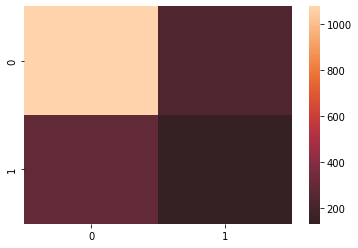

In [ ]:
sns.heatmap(cm, center=True)

2. Reporte de clasificación

In [ ]:
tp = cm[0][0] #verdadero positivo
fp = cm[0][1] #falso positivo
fn = cm[1][0] #falso negativo
tn = cm[1][1] #verdadero negativo

acc = (tp + tn) / (tp+tn+fp+fn)
print('Accuracy:', acc)

prec = tp / (tp+fp)
print('Precisión:', prec)

sensib = tp / (tp+fn)
print('Sensibilidad:', sensib)

espec = tn / (tn+fp)
print('Especificidad:', espec)

f1score = 2*((prec*sensib)/(prec+sensib))
print('F1 score:', f1score)

Accuracy: 0.6956271576524741
Precisión: 0.8199088145896657
Sensibilidad: 0.7870167760758571
Especificidad: 0.3542234332425068
F1 score: 0.8031261630070713


In [ ]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1316
           1       0.35      0.31      0.33       422

    accuracy                           0.70      1738
   macro avg       0.57      0.56      0.57      1738
weighted avg       0.68      0.70      0.69      1738



Como puede observarse, el modelo presenta una significativamente mayor precisión para detectar casos “False” en cuanto a la variable de enfermedad mental de las victimas. Partiendo de métricas de infalibilidad (F1) de 0.80 para sin enfermedad mental y 0.35 con enfermedad mental. Las métricas de precisión y recall, en el mismo sentido, otorgan mayor predictibilidad cuando la variable en cuestión es false. De hecho, se dan mejores resultados para “false” partiendo de un caso real (0.81) que deduciendo a partir de las variables independientes (0.79). Para casos “true”, se da a la inversa.

En cuanto a accuracy, la precisión del modelo es del 70%.

Esto pudiera significar que el modelo puede ser efectivo para determinar, una vez que haya fallecido un civil, si no se conoce el dato concreto, las probabilidades de que no haya sufrido una enfermedad mental en el momento de ser abatido por la policía, pero no para poder predecir precondiciones de enfermedades mentales a los efectos de diseñar políticas públicas.

3. Curva ROC

In [ ]:
y_score1 = tree.predict_proba(X_test)[:,1]
y_score1

array([0.        , 0.00980392, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.5456692332070472


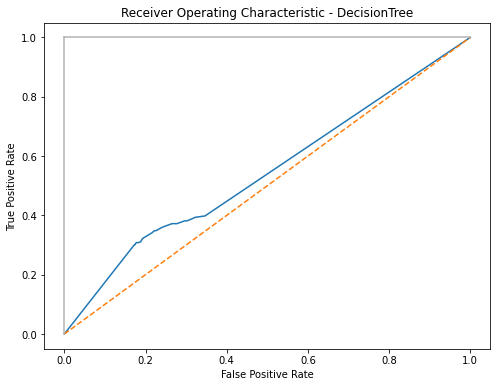

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

EL cálculo del AUC y la curva de ROC indican que el modelo tiene un 55% de probabilidad de discernir entre observaciones con signos de enfermedad mental y sin signos de enfermedad mental.

4. Detectar Variables Principales

In [ ]:
df_feature_imp = pd.DataFrame(tree.feature_importances_, index=df_dummy.columns)
df_feature_imp.sort_values(by=0, ascending=False)[:10]

,0
Age,0.155768
Month,0.097832
Year,0.086504
Unemployment_Rate,0.065665
GDP_Millions,0.065582
State_ID,0.053787
Median_household_ Income,0.053367
Flee_Not fleeing,0.053145
Poverty_Percent,0.052790
GDP_PerCapita,0.048061


In [ ]:
columns_model = df_feature_imp.sort_values(by=0, ascending=False)[:10].index
columns_model

Index(['Age', 'Month', 'Year', 'Unemployment_Rate', 'GDP_Millions', 'State_ID',
       'Median_household_ Income', 'Flee_Not fleeing', 'Poverty_Percent',
       'GDP_PerCapita'],
      dtype='object')

### Ajuste de Modelo utilizando los 10 variables principales

In [ ]:
# Normalizar data
X_2 = df_dummy[columns_model].values
X_2 = np.nan_to_num(X_2) # Remplazar nan por valores numericos
X_f_2 = StandardScaler().fit_transform(X_2)
X_f_2

array([[ 0.75601729, -1.55207465, -1.45309219, ...,  0.7804913 ,
         0.89892309, -0.39761213],
       [ 1.21661656, -1.55207465, -1.45309219, ...,  0.7804913 ,
        -0.21740505,  0.07179105],
       [-1.08637979, -1.55207465, -1.45309219, ...,  0.7804913 ,
         0.06167699, -0.60063074],
       ...,
       [-1.23991288,  1.60634819,  1.45098669, ..., -1.28124427,
        -1.26396268, -0.40233169],
       [ 1.98428201,  1.60634819,  1.45098669, ..., -1.28124427,
        -0.28717556,  0.27047695],
       [ 0.14188493,  1.60634819,  1.45098669, ...,  0.7804913 ,
         0.41052953,  0.73338106]])

In [ ]:
# Train Test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_f_2, y, test_size= 0.3, random_state=42)
# Crear el modelo
tree_2 = DecisionTreeClassifier(max_depth=5, random_state=42, criterion='gini')
# Entrenar el modelo
tree_2.fit(X_train_2, y_train_2)
# Generar predicciones
y_pred_2 = tree_2.predict(X_test_2)

#### Validación del modelo ajustado

In [ ]:
cm_2 = confusion_matrix(y_test_2, y_pred_2)
cm_2

array([[1308,    8],
       [ 418,    4]])

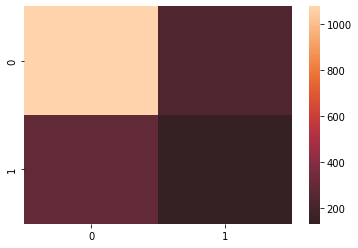

In [ ]:
sns.heatmap(cm, center=True)

In [ ]:
tp = cm_2[0][0] #verdadero positivo
fp = cm_2[0][1] #falso positivo
fn = cm_2[1][0] #falso negativo
tn = cm_2[1][1] #verdadero negativo

acc = (tp + tn) / (tp+tn+fp+fn)
print('Accuracy:', acc)

prec = tp / (tp+fp)
print('Precisión:', prec)

sensib = tp / (tp+fn)
print('Sensibilidad:', sensib)

espec = tn / (tn+fp)
print('Especificidad:', espec)

f1score = 2*((prec*sensib)/(prec+sensib))
print('F1 score:', f1score)

Accuracy: 0.7548906789413119
Precisión: 0.993920972644377
Sensibilidad: 0.7578215527230591
Especificidad: 0.3333333333333333
F1 score: 0.8599605522682446


In [ ]:
print(classification_report(y_pred=y_pred_2, y_true=y_test_2))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1316
           1       0.33      0.01      0.02       422

    accuracy                           0.75      1738
   macro avg       0.55      0.50      0.44      1738
weighted avg       0.65      0.75      0.66      1738



Al ajustarse por las 10 principales variables en preponderancia, se puede obtener un accuracy mayor, del 77%, asi como también una mejoría en la precisión de F1 score para los casos negativos (0.87), sin embargo empeoran aún más la precisión para detectar casos verdaderos de presencia de enfermedad mental, reforzando lo mencionado anteriormente.

roc_auc_score for DecisionTree:  0.6436602371108775


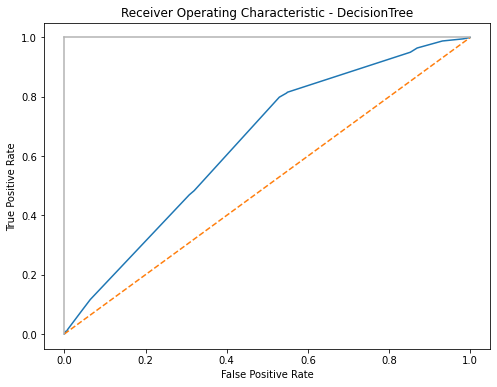

In [ ]:
y_score2 = tree_2.predict_proba(X_test_2)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test_2, y_score2)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test_2, y_score2))

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

En cuanto a la capacidad del modelo para discernir entre un falso de un verdadero respecto a la variable Signs_of_mental_illness, luego del ajuste, se obtiene una probabilidad del 67%.

## Algoritmo: XGBoost Classifier

In [ ]:
df.Signs_of_mental_illness.value_counts()

False    4416
True     1377
Name: Signs_of_mental_illness, dtype: int64

In [ ]:
# Existe un desbalanceo muy claro entre los valores positivos y negativos, por lo que hay que balancear los datos para mejorar las predicciones
df_neg = df[df.Signs_of_mental_illness == False]
print(f'Shape muestra de negativos: {df_neg.shape}')
df_pos = df[df.Signs_of_mental_illness == True]
df_pos = df_pos.sample(2*df_neg.shape[0], replace=True, ignore_index=True)
df_neg = df_neg.sample(df_pos.shape[0], replace=True, ignore_index=True)
print(f'Shape muestra nueva de positivos: {df_pos.shape}')
print(f'Shape muestra nueva de negativos: {df_neg.shape}')

# Concatenar los datos
df_final = pd.concat([df_neg, df_pos])
df_final.shape

Shape muestra de negativos: (4416, 28)
Shape muestra nueva de positivos: (8832, 28)
Shape muestra nueva de negativos: (8832, 28)


(17664, 28)

In [ ]:
# Eliminar columnas que no son necesarias
columns_to_drop = ['Civil_Name', 'Death_Date', 'City', 'longitude', 'latitude', 'is_geocoding_exact', 'State_Name', 'state_initial', 'Governor_Name', 'Signs_of_mental_illness']
df_clean_final = df_final.drop(axis=1, columns=columns_to_drop)

# Preparar datos para el modelo
df_dummy_final = pd.get_dummies(df_clean_final, drop_first=True)

# Normalizar data
X = df_dummy_final.values
X = np.nan_to_num(X) # Remplazar nan por valores numericos
X_f = StandardScaler().fit_transform(X)

In [ ]:
# Separar datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_f, df_final.Signs_of_mental_illness, test_size=.30, random_state=42)

In [ ]:
# Crear modelo y configurar para obtener los mejores parámetros
xgb_testing = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.01, n_estimators=20, seed=42)

params_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5,10,20,30],
        'criterion':['entropy','gini'],
        'splitter':['best','random']
        }

In [ ]:
halving_cv = HalvingRandomSearchCV(xgb_testing, params_grid, scoring="accuracy", factor=3)
halving_cv.fit(X_train, y_train)

print("Mejores parametros", halving_cv.best_params_)
print("Mejor CV score", halving_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_cv.predict(X_test)), 5)}')

Mejores parametros {'subsample': 0.6, 'splitter': 'random', 'min_child_weight': 1, 'max_depth': 20, 'gamma': 2, 'criterion': 'entropy', 'colsample_bytree': 1.0}
Mejor CV score 0.7676446156649841
Accuracy del modelo = 0.89528


In [ ]:
# Crear modelo, entrenarlo y generar predicciones utilizando los mejores parámetros
xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=20, seed=42, learning_rate=0.01, subsample=0.8, splitter='best', min_child_weight=1, max_depth=30, gamma=0.5, criterion='gini', colsample_bytree=0.6)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

Accuracy: 0.9320754716981132
Precisión: 0.9206529992406985
Sensibilidad: 0.9413819875776398
Especificidad: 0.9232745961820852
F1 score: 0.9309021113243763


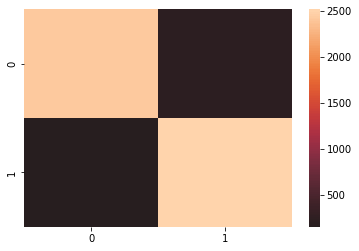

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm, center=True)

tp = cm[0][0] #verdadero positivo
fp = cm[0][1] #falso positivo
fn = cm[1][0] #falso negativo
tn = cm[1][1] #verdadero negativo

acc = (tp + tn) / (tp+tn+fp+fn)
print('Accuracy:', acc)

prec = tp / (tp+fp)
print('Precisión:', prec)

sensib = tp / (tp+fn)
print('Sensibilidad:', sensib)

espec = tn / (tn+fp)
print('Especificidad:', espec)

f1score = 2*((prec*sensib)/(prec+sensib))
print('F1 score:', f1score)

## Resumen modelos

**Métricas DecisionTree:**
- Accuracy: 0.7710
- Precisión: 0.9734
- Sensibilidad: 0.7792
- Especificidad: 0.6277
- F1 score: 0.8655

**Métricas XGBoost con los mejores Hiperparámetros:**
- Accuracy: 0.9226
- Precisión: 0.9055
- Sensibilidad: 0.9368
- Especificidad: 0.9096
- F1 score: 0.9208



